<a href="https://colab.research.google.com/github/Ankit000001/Concrete-Strength/blob/master/tempG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        cmt    slg    fly    wat  plas      ca     fa  age    cst
0     540.0    0.0    0.0  162.0   2.5  1040.0  676.0   28  79.99
1     540.0    0.0    0.0  162.0   2.5  1055.0  676.0   28  61.89
2     332.5  142.5    0.0  228.0   0.0   932.0  594.0  270  40.27
3     332.5  142.5    0.0  228.0   0.0   932.0  594.0  365  41.05
4     198.6  132.4    0.0  192.0   0.0   978.4  825.5  360  44.30
...     ...    ...    ...    ...   ...     ...    ...  ...    ...
1025  276.4  116.0   90.3  179.6   8.9   870.1  768.3   28  44.28
1026  322.2    0.0  115.6  196.0  10.4   817.9  813.4   28  31.18
1027  148.5  139.4  108.6  192.7   6.1   892.4  780.0   28  23.70
1028  159.1  186.7    0.0  175.6  11.3   989.6  788.9   28  32.77
1029  260.9  100.5   78.3  200.6   8.6   864.5  761.5   28  32.40

[1030 rows x 9 columns]
35.817961165048544
(1030, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------

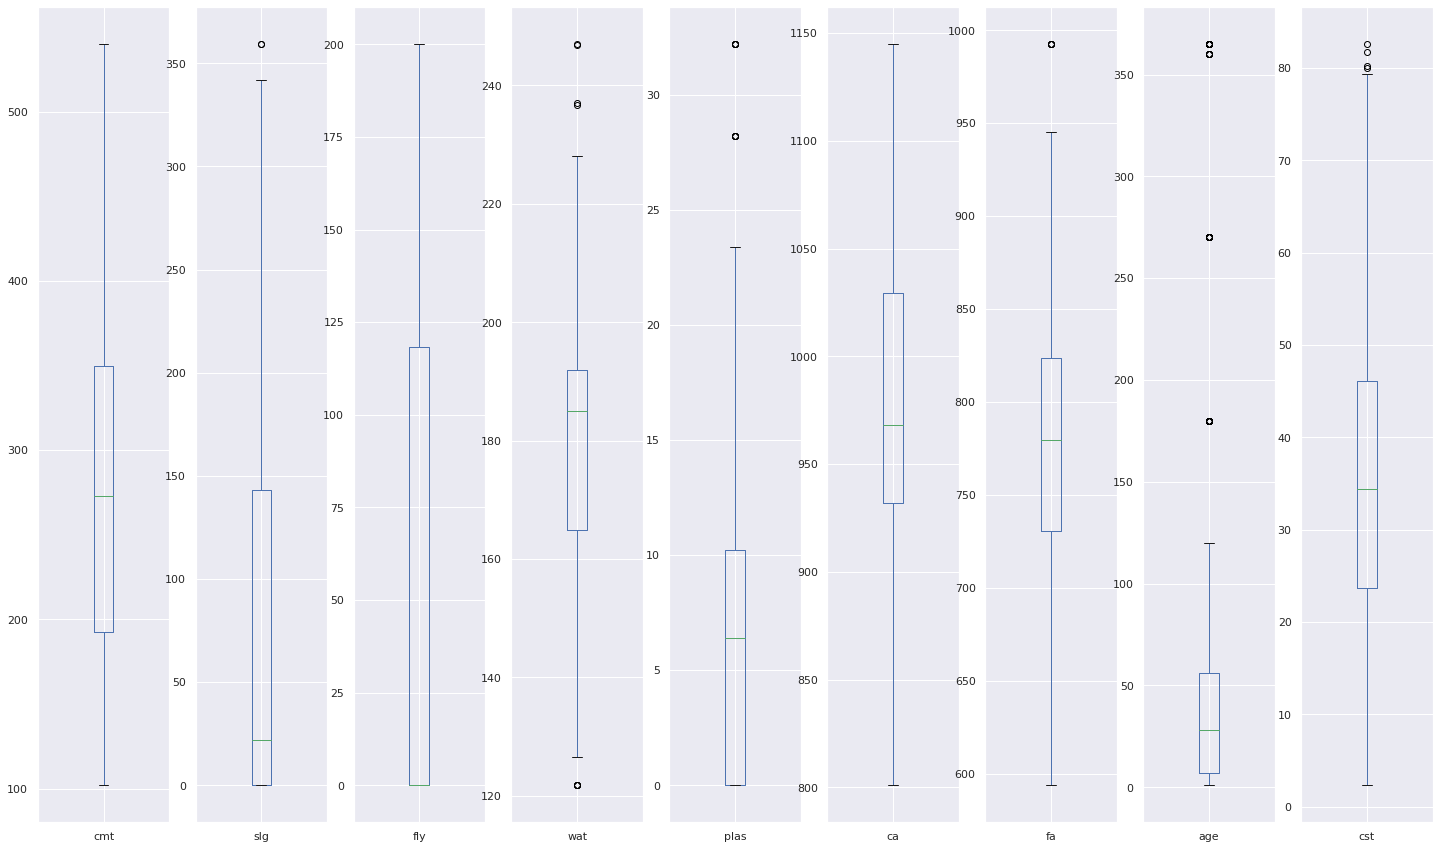

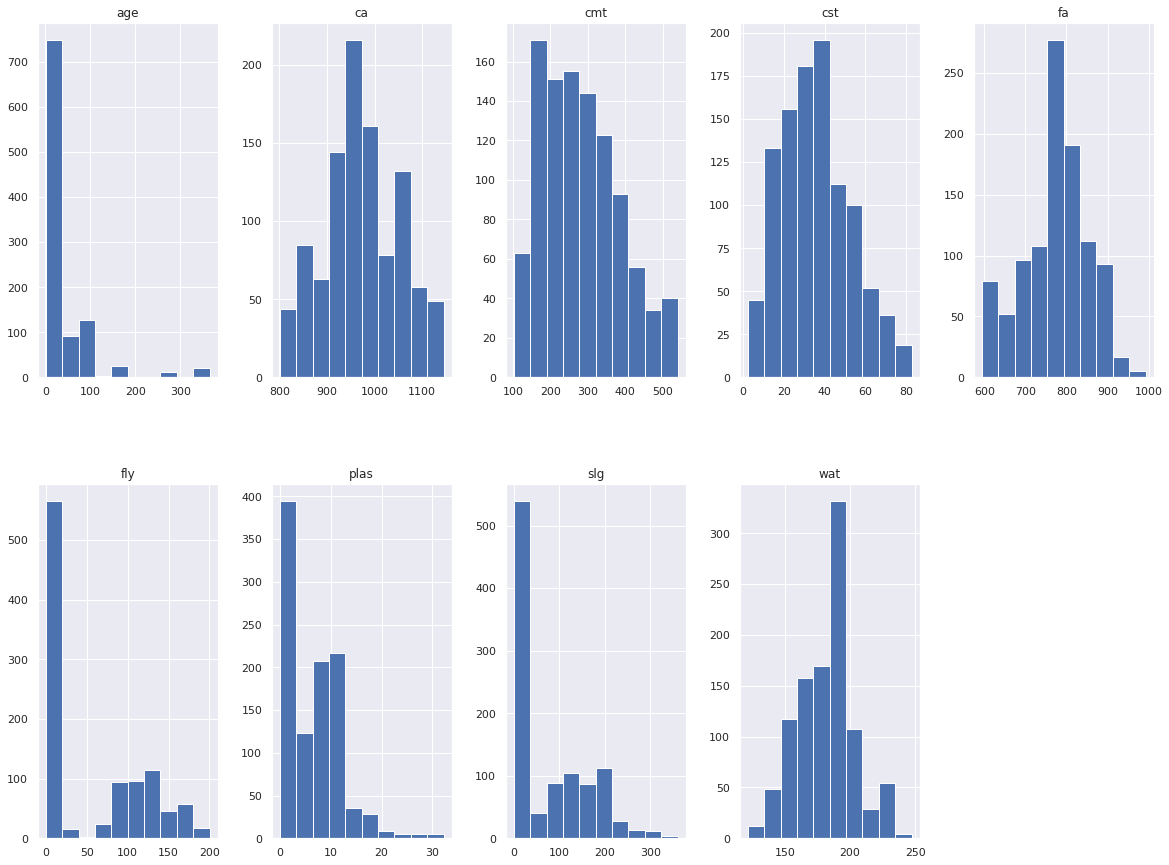

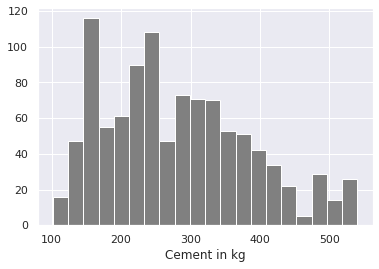

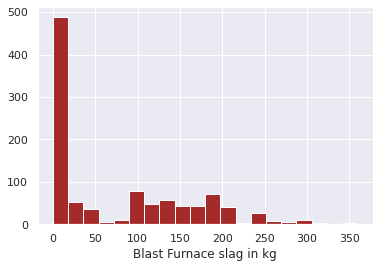

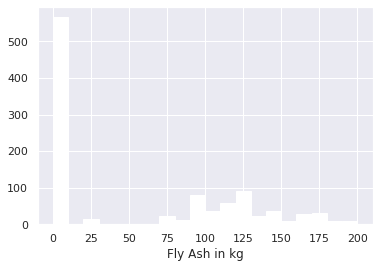

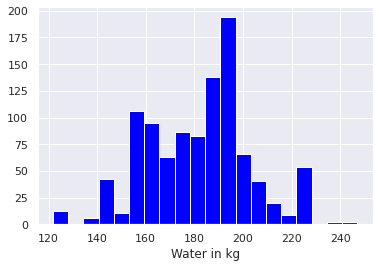

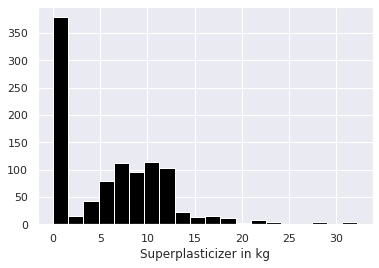

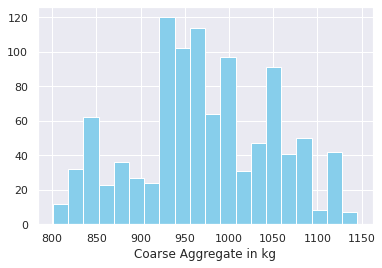

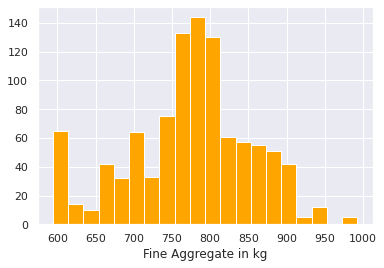

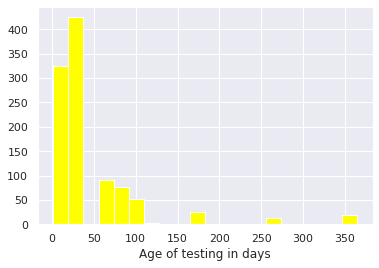

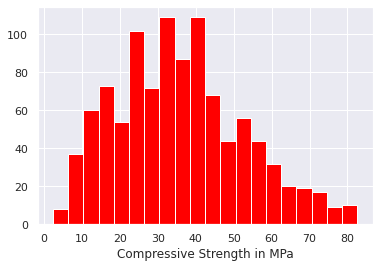

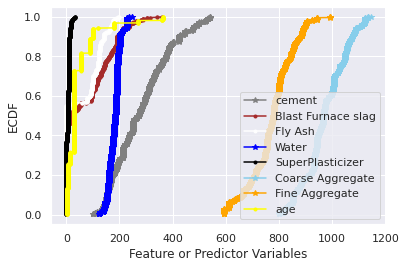

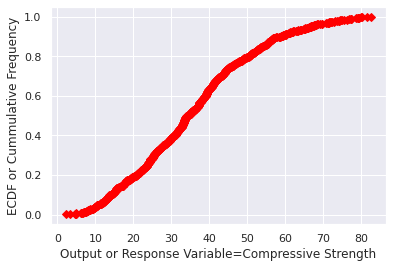

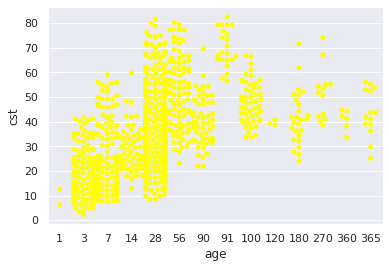

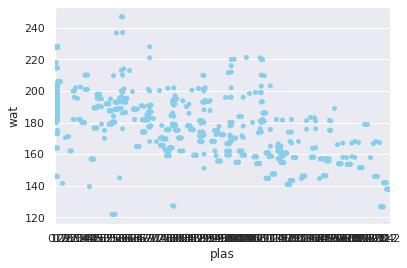

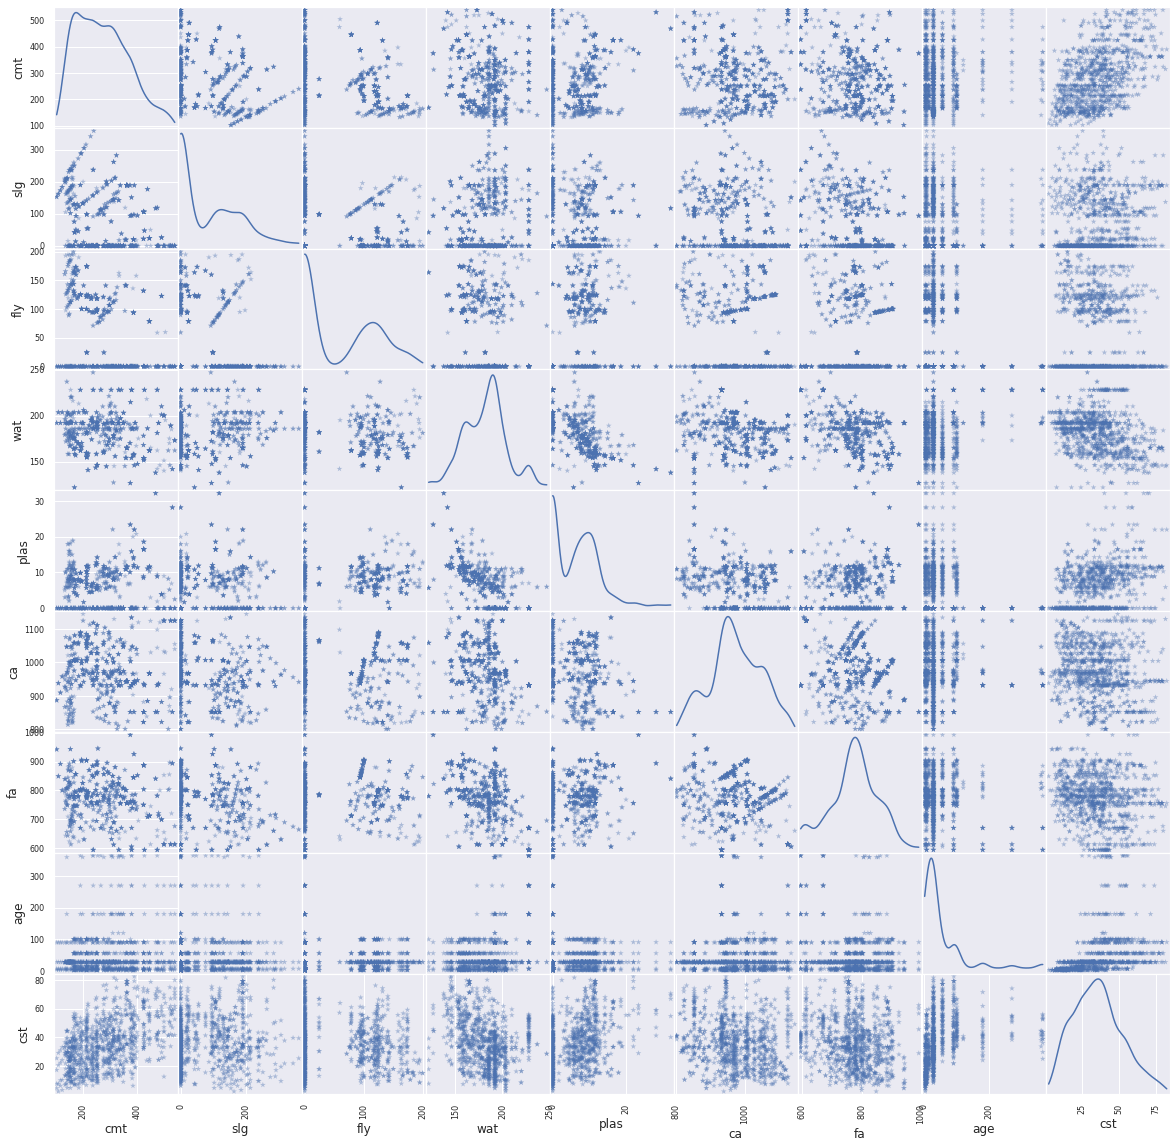

R2 of LinearRegression is: 0.6032391892181876
R2 of Ridge without hyperparameter tuning is: 0.4961658865241222
R2 of Lasso without hyperparameter tuning is: 0.6032391892181872
The best value of hyperparameter alpha is: {'alpha': 1.0} R2 of Ridge after hyperparameter tuning is: 0.5864293272508314


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:201: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42696.69682560209, tolerance: 22.295786977281555
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWa

The best value of hyperparameter alpha is: {'alpha': 0} R2 of Lasso after hyperparameter tuning is: 0.586429000977996
Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.5534826271739921
Epoch 1/1
824/824 [==============================] - 0s 125us/step - loss: 1092.8604
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 80)                720       
_________________________________________________________________
dense_6 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_7 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 81        
Total params: 13,761
Trainable params: 13,761
Non-trainable params: 0
__________

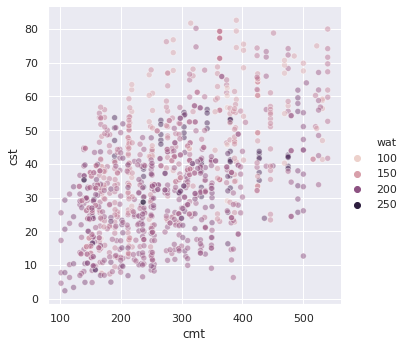

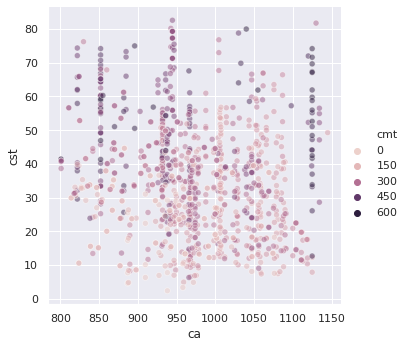

In [0]:
# -*- coding: utf-8 -*
import numpy as np           #Abbreviation for numpy array as i.e. alias,to play with arrays of columns in dataset
import pandas as pd          #Abbreviation for pandas library which is used to load dataset
#Loading libraries
#from pandas import read_csv     #to read csv format datafiles but no need as we've already imported whole pandas
from pandas.plotting import scatter_matrix
from matplotlib import pyplot      #Plotting various simpler plots
import seaborn as sns              #Nicely formatted plot,its from matplotlib
sns.set()                          #Now sns is ready to use using pyplot
from sklearn.model_selection import train_test_split   #to separate testing & training dataset
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler     #for feature scaling
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential                 #Dense & Sequential both are used for adding & defining structure of model
from keras.models import load_model                 #This is needed for saving a model & after saving summary,reloading & making predictions
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#Loading Dataset
names=['cmt','slg','fly','wat','plas','ca','fa','age','cst']     #Name of columns
#cement,blast furnace slag,fly ash,water,superplasticizer,coarse aggregate,fine aggregate,age,compressive strength
dataset = pd.read_csv("mycs.csv",names=names)    #Reading/importing of dataset,csv file should be on same directry path as specified in preferences,here on desktop
print(dataset)          #Printing in consol window of whole imported dataset 
#Storing various column in numpy arrays in case needed later
np_cmt=np.array(dataset.cmt)
np_slg=np.array(dataset.slg)
np_fly=np.array(dataset.fly)
np_wat=np.array(dataset.wat)
np_plas=np.array(dataset.plas)
np_ca=np.array(dataset.ca)
np_fa=np.array(dataset.fa)
np_age=np.array(dataset.age)
np_cst=np.array(dataset.cst)
print(np.mean(np_cst))          #Mean of response or output variable cst
#Summarizing the Dataset
#Dimension of Dataset
print(dataset.shape)
#All information about dataset
print(dataset.info())
#Eye on Data
print(dataset.head(20))
#Statistical Summary
print(dataset.describe())
#Class Distribution
print(dataset.groupby('cst').size())

#Data Visualization
## Univariate plots
#Box & Whisker plots
dataset.plot(kind='box',subplots=True,layout=(1,9),sharex=False,sharey=False,figsize=[25,15])
pyplot.show()
#Histogram                          #To show we've taken too much variety of data & it is uniform data collection as well
dataset.hist(layout=(2,5),figsize=[20,15])          #layout is used to avoid conjetion,i.e. 2 rows & 5 col,combined histogram
pyplot.show()
_=pyplot.hist(np_cmt,bins=20,color='Gray')        #Default bins(no of vertical bars) is 10 in matplotlib
_=pyplot.xlabel('Cement in kg')
pyplot.show()
_=pyplot.hist(np_slg,bins=20,color='Brown')
_=pyplot.xlabel('Blast Furnace slag in kg')
pyplot.show()
_=pyplot.hist(np_fly,bins=20,color='White')
_=pyplot.xlabel('Fly Ash in kg')
pyplot.show()
_=pyplot.hist(np_wat,bins=20,color='Blue')
_=pyplot.xlabel('Water in kg')
pyplot.show()
_=pyplot.hist(np_plas,bins=20,color='Black')
_=pyplot.xlabel('Superplasticizer in kg')
pyplot.show()
_=pyplot.hist(np_ca,bins=20,color='Skyblue')
_=pyplot.xlabel('Coarse Aggregate in kg')
pyplot.show()
_=pyplot.hist(np_fa,bins=20,color='Orange')
_=pyplot.xlabel('Fine Aggregate in kg')
pyplot.show()
_=pyplot.hist(np_age,bins=20,color='Yellow')
_=pyplot.xlabel('Age of testing in days')
pyplot.show()
_=pyplot.hist(np_cst,bins=20,color='Red')
_=pyplot.xlabel('Compressive Strength in MPa')
pyplot.show()
#ECDF                  #To show how small magnitude or how big magnitude features are taken ,its like grain size distribution analysis curve in soil,from this we can also read every percentile (including median) value
def ecdf(arr):         #It is manually defined function to obtain x & y inputs to ecdf plot 
    x=np.sort(arr)
    n=len(arr)
    y = np.arange(1, len(arr)+1) / n
    return x, y

x_cmt,y_cmt=ecdf(np_cmt)
x_slg,y_slg=ecdf(np_slg)
x_fly,y_fly=ecdf(np_fly)
x_wat,y_wat=ecdf(np_wat)
x_plas,y_plas=ecdf(np_plas)
x_ca,y_ca=ecdf(np_ca)
x_fa,y_fa=ecdf(np_fa)
x_age,y_age=ecdf(np_age)
x_cst,y_cst=ecdf(np_cst)
#ECDF of input features
_ = pyplot.plot(x_cmt, y_cmt,color='gray', marker='*')
_ = pyplot.plot(x_slg, y_slg,color='brown', marker='.')
_ = pyplot.plot(x_fly, y_fly,color='white', marker='.')
_ = pyplot.plot(x_wat, y_wat,color='blue', marker='*')
_ = pyplot.plot(x_plas, y_plas,color='black', marker='.')
_ = pyplot.plot(x_ca, y_ca, color='skyblue',marker='*')
_ = pyplot.plot(x_fa, y_fa, color='orange',marker='*')
_ = pyplot.plot(x_age, y_age,color='yellow', marker='.')
_ = pyplot.legend(('cement', 'Blast Furnace slag', 'Fly Ash','Water','SuperPlasticizer','Coarse Aggregate','Fine Aggregate','age'), loc='lower right')
_=pyplot.xlabel('Feature or Predictor Variables')
_=pyplot.ylabel('ECDF')
pyplot.show()
#ECDF of output Variable
_ = pyplot.plot(x_cst, y_cst,color='red', marker='D')
_=pyplot.xlabel('Output or Response Variable=Compressive Strength')
_=pyplot.ylabel('ECDF or Cummulative Frequency')
pyplot.show()
## Multivariate plots
#Bee Sworm Plots
_=sns.swarmplot(x='age',y='cst',data=dataset,color='yellow')   #To show even in less age cst can be a bit higher depending upon proportion of various ingredients,but it is still relatively lesser than more days cst
pyplot.show()
_=sns.swarmplot(x='plas',y='wat',data=dataset,color='skyblue')   #To show more the plasticizer less the water is consumed,it proves validity of chosen dataset 
pyplot.show()
#Scatter plot
scatter_matrix(dataset,figsize=[20,20],diagonal="kde",alpha=0.4,grid=True,marker='*')    #figsize is used to increase size of grids & kde gives better view than default histogram for diagonal elements 
pyplot.show()
#Relplot(3 variate)
sns.relplot(x='cmt',y='cst',hue='wat',alpha=0.5,data=dataset)     #Effect of w/c ratio on compressive strength
sns.relplot(x='ca',y='cst',hue='cmt',alpha=0.5,data=dataset)      #when ca is very less more cement is needed & cst is comparatively less,when ca is very much then also due to bad gradation cement is more needed but high cst


#Algorithms

##1.Separating the validation dataset          #Let last 20% of read dataset,we take as validation dataset,validation dataset is the one on which we will test accuracy later on
array= dataset.values                 #dataframe(list) to array conversion
X=array[:,0:-1]                       #Array splicing,all rows & all columns except last one(cst,because it is x & cst is result)  #indice -1 is equal to last col(here -1=8)...this is called negative indices
Y=array[:,-1]                         #All rows & only last column,i.e. cst=output column
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)     #use of train_test_split as per its syntax

#print(X_train,Y_train)              #To cross validate manually that split b/w training & validation dataset is done in disired way & same as it was in csv file
#----------------------------Review & retry from here------------------------
##2.K fold harness
   #  kfold=StratifiedKFold(n_splits=10,random_state=1,sh￼uffle=True) #In every K=10 no. of data K-1 are training & last one is testing

##3.Building the models               #from sklearn using predefined models 
#models=[]
#Logistic regression
#models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
#Linear Discriminant Analysis
#models.append(('LDA',LinearDiscriminantAnalysis()))
#K-Nearest Neighbors
#models.append(('KNN',KNeighborsClassifier()))
#Classification & regression trees
#models.append(('CART',DecisionTreeClassifier()))
#Gaussian Naive Bayes
#models.append(('NB',GaussianNB()))
#Support Vector Machines
#models.append(('SVM',SVC(gamma='auto')))

#Evaluating each model
#results=[]
#names=[]

#Creating results for Selecting Best Model
#for name,model in models:                   #Iteration for executing each model one by one
   # kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
   # cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
#results.append(cv_results)
#names.append(name)
#print('%s: %f \t %f'%(name,cv_results.mean(),cv_results.std()))
#Comparing Algorithms
#pyplot.boxplot(results,labels=names)
#pyplot.show()

#LinearRegression Model(Unregularized)
lnreg=LinearRegression()       #Initiallizing LinearRegression to a variable lnreg
lnreg.fit(X_train,Y_train)                            #Fit the model on training dataset
lnreg_pred=lnreg.predict(X_test)                   #Prediction on test data & storing these predictions in a variable lnreg_pred
lnregscore=lnreg.score(X_test,Y_test)                    #This is by default R^2 score####WITHOUT REGULARIZATION
print("R2 of LinearRegression is:",lnregscore)                                     #It is R^2 of not regularized linear regression

#Ridge Regression1(Regularized regression model,it uses alpha value(this control complexity of model,i.e. coeffi. are too large or too low,i.e. overfit or underfit) obtained by hyperparameter tuning,here firstly using a random alpha and seeing score)
ridge1=Ridge(alpha=0.5,normalize=True)    #initiallizing Ridge to a variable ridge1,it is without hyperparameter tuning & alpha is taken randomly as 0.5
ridge1.fit(X_train,Y_train)
ridge1_pred=ridge1.predict(X_test)
ridge1score=ridge1.score(X_test,Y_test)
print("R2 of Ridge without hyperparameter tuning is:",ridge1score)

#Lasso Regression1(without hyperparameter tuning)      #R2 is really less(=0),since lasso may have eliminated most of the feature variables
lasso1=Lasso(alpha=0,normalize=True)
lasso1.fit(X_train,Y_train)
lasso1_pred=lasso1.predict(X_test)
lasso1score=lasso1.score(X_test,Y_test)
print("R2 of Lasso without hyperparameter tuning is:",lasso1score)

#Hyperparameter Tuning(selecting best value for hyperparameter,for this we also do cross validation together,so that best hyperperameter is not limited to some data only)
#1.Hyperparameter tuning for RidgeRegression,(here hyperparameter is only 1,alpha)
c=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
alpha_grid={'alpha': c}    #defining all possible values of alpha that are 0 to 1,notice special syntax
ridge2=Ridge()                            #Initializing model without giving any special random alpha value
ridge2_cv=GridSearchCV(ridge2,alpha_grid,cv=10)   #syntax of GridSearchCV,including 10 fold cross validation within GridSearchCV
ridge2_cv.fit(X_train,Y_train)                      #Fitting modified model(with best alpha)to training dataset
alpharidge=ridge2_cv.best_params_                    #Just for knowing best value of alpha
ridge2score=ridge2_cv.best_score_                    #R2 of best alpha(hyperparametertunned)ridge regression model
print("The best value of hyperparameter alpha is:",alpharidge , "R2 of Ridge after hyperparameter tuning is:",ridge2score)

#2.Hyperparameter tuning for LassoRegression,(here hyperparameter is only 1,alpha)
d=[0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,-1.0]
alpha_grid={'alpha': d}
lasso2=Lasso()
lasso2_cv=GridSearchCV(lasso2,alpha_grid,cv=10)
lasso2_cv.fit(X_train,Y_train)
alphalasso=lasso2_cv.best_params_ 
lasso2score=lasso2_cv.best_score_   
print("The best value of hyperparameter alpha is:",alphalasso , "R2 of Lasso after hyperparameter tuning is:",lasso2score)

###To do:-Check hyperparameter tuning 
##find best parameter as per Lasso regression
#Apply more of regression models,also see hyperparameter tuning of LinearRegression if possible

#Polynomial Regression(just linear regression with raised powers to feature variables)

#Feature Scaling for linear regression(so that magnitude variation between various features doesn't affect prediction ,as most of the regression models use distance to predict,hence influenced by inequal feature magnitudes)



#ElasticNet classifier with feature scaling & hyperparameter tuning
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}


# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, Y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, Y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))












#VERY SIMPLE(NOT TUNED & ARBITARY ACTIVATION FUN & ARBITARY NO OF NODES & LATERS & ARBITARY OPTIMIZER OR LEARNING RATE,no epochs hence ordinary gradient decsent on whole training dataset)
#Adding a deep learning model using sequential with 80 nodes & 3 hidden layer as a trial with tanh activation function on output of each layer

model=Sequential()
model.add(Dense(80,activation='tanh',input_shape=(8,)))   #It is first hidden layer
model.add(Dense(80,activation='tanh'))
model.add(Dense(80,activation='tanh'))
model.add(Dense(1))                                       #Final output layer with 1 node as predicted cst

#Compiling the model,using most common learning rate "adam" & most common loss function for regression problem as "Mean Squared error"

model.compile(optimizer='adam',loss='mean_squared_error')

#Fitting the model to training data

model.fit(X_train,Y_train)

#Saving the model(In HDF% format with .h5 extension,name ArbANN)

model.save('ArbANN.h5')

#Reloading the model
ArbANN=load_model('ArbANN.h5')

#Making predictions

predictions=ArbANN.predict(X_test)

#Looking at summary of model(Here params# is the number of weights & it is equal to (nodes in prev layer)*(nodes in current layer)+nodes in current layer,which is bias term)
ArbANN.summary()




# -*- coding: utf-8 -*
import numpy as np           #Abbreviation for numpy array as i.e. alias,to play with arrays of columns in dataset
import pandas as pd          #Abbreviation for pandas library which is used to load dataset
#Loading libraries
#from pandas import read_csv     #to read csv format datafiles but no need as we've already imported whole pandas
from pandas.plotting import scatter_matrix
from matplotlib import pyplot      #Plotting various simpler plots
import seaborn as sns              #Nicely formatted plot,its from matplotlib
sns.set()                          #Now sns is ready to use using pyplot
from sklearn.model_selection import train_test_split   #to separate testing & training dataset
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler     #for feature scaling
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential                 #Dense & Sequential both are used for adding & defining structure of model
from keras.models import load_model                 #This is needed for saving a model & after saving summary,reloading & making predictions
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#Loading Dataset
names=['cmt','slg','fly','wat','plas','ca','fa','age','cst']     #Name of columns
#cement,blast furnace slag,fly ash,water,superplasticizer,coarse aggregate,fine aggregate,age,compressive strength
dataset = pd.read_csv("mycs.csv",names=names)    #Reading/importing of dataset,csv file should be on same directry path as specified in preferences,here on desktop
print(dataset)          #Printing in consol window of whole imported dataset 
#Storing various column in numpy arrays in case needed later
np_cmt=np.array(dataset.cmt)
np_slg=np.array(dataset.slg)
np_fly=np.array(dataset.fly)
np_wat=np.array(dataset.wat)
np_plas=np.array(dataset.plas)
np_ca=np.array(dataset.ca)
np_fa=np.array(dataset.fa)
np_age=np.array(dataset.age)
np_cst=np.array(dataset.cst)
print(np.mean(np_cst))          #Mean of response or output variable cst
#Summarizing the Dataset
#Dimension of Dataset
print(dataset.shape)
#All information about dataset
print(dataset.info())
#Eye on Data
print(dataset.head(20))
#Statistical Summary
print(dataset.describe())
#Class Distribution
print(dataset.groupby('cst').size())

#Data Visualization
## Univariate plots
#Box & Whisker plots
dataset.plot(kind='box',subplots=True,layout=(1,9),sharex=False,sharey=False,figsize=[25,15])
pyplot.show()
#Histogram                          #To show we've taken too much variety of data & it is uniform data collection as well
dataset.hist(layout=(2,5),figsize=[20,15])          #layout is used to avoid conjetion,i.e. 2 rows & 5 col,combined histogram
pyplot.show()
_=pyplot.hist(np_cmt,bins=20,color='Gray')        #Default bins(no of vertical bars) is 10 in matplotlib
_=pyplot.xlabel('Cement in kg')
pyplot.show()
_=pyplot.hist(np_slg,bins=20,color='Brown')
_=pyplot.xlabel('Blast Furnace slag in kg')
pyplot.show()
_=pyplot.hist(np_fly,bins=20,color='White')
_=pyplot.xlabel('Fly Ash in kg')
pyplot.show()
_=pyplot.hist(np_wat,bins=20,color='Blue')
_=pyplot.xlabel('Water in kg')
pyplot.show()
_=pyplot.hist(np_plas,bins=20,color='Black')
_=pyplot.xlabel('Superplasticizer in kg')
pyplot.show()
_=pyplot.hist(np_ca,bins=20,color='Skyblue')
_=pyplot.xlabel('Coarse Aggregate in kg')
pyplot.show()
_=pyplot.hist(np_fa,bins=20,color='Orange')
_=pyplot.xlabel('Fine Aggregate in kg')
pyplot.show()
_=pyplot.hist(np_age,bins=20,color='Yellow')
_=pyplot.xlabel('Age of testing in days')
pyplot.show()
_=pyplot.hist(np_cst,bins=20,color='Red')
_=pyplot.xlabel('Compressive Strength in MPa')
pyplot.show()
#ECDF                  #To show how small magnitude or how big magnitude features are taken ,its like grain size distribution analysis curve in soil,from this we can also read every percentile (including median) value
def ecdf(arr):         #It is manually defined function to obtain x & y inputs to ecdf plot 
    x=np.sort(arr)
    n=len(arr)
    y = np.arange(1, len(arr)+1) / n
    return x, y

x_cmt,y_cmt=ecdf(np_cmt)
x_slg,y_slg=ecdf(np_slg)
x_fly,y_fly=ecdf(np_fly)
x_wat,y_wat=ecdf(np_wat)
x_plas,y_plas=ecdf(np_plas)
x_ca,y_ca=ecdf(np_ca)
x_fa,y_fa=ecdf(np_fa)
x_age,y_age=ecdf(np_age)
x_cst,y_cst=ecdf(np_cst)
#ECDF of input features
_ = pyplot.plot(x_cmt, y_cmt,color='gray', marker='*')
_ = pyplot.plot(x_slg, y_slg,color='brown', marker='.')
_ = pyplot.plot(x_fly, y_fly,color='white', marker='.')
_ = pyplot.plot(x_wat, y_wat,color='blue', marker='*')
_ = pyplot.plot(x_plas, y_plas,color='black', marker='.')
_ = pyplot.plot(x_ca, y_ca, color='skyblue',marker='*')
_ = pyplot.plot(x_fa, y_fa, color='orange',marker='*')
_ = pyplot.plot(x_age, y_age,color='yellow', marker='.')
_ = pyplot.legend(('cement', 'Blast Furnace slag', 'Fly Ash','Water','SuperPlasticizer','Coarse Aggregate','Fine Aggregate','age'), loc='lower right')
_=pyplot.xlabel('Feature or Predictor Variables')
_=pyplot.ylabel('ECDF')
pyplot.show()
#ECDF of output Variable
_ = pyplot.plot(x_cst, y_cst,color='red', marker='D')
_=pyplot.xlabel('Output or Response Variable=Compressive Strength')
_=pyplot.ylabel('ECDF or Cummulative Frequency')
pyplot.show()
## Multivariate plots
#Bee Sworm Plots
_=sns.swarmplot(x='age',y='cst',data=dataset,color='yellow')   #To show even in less age cst can be a bit higher depending upon proportion of various ingredients,but it is still relatively lesser than more days cst
pyplot.show()
_=sns.swarmplot(x='plas',y='wat',data=dataset,color='skyblue')   #To show more the plasticizer less the water is consumed,it proves validity of chosen dataset 
pyplot.show()
#Scatter plot
scatter_matrix(dataset,figsize=[20,20],diagonal="kde",alpha=0.4,grid=True,marker='*')    #figsize is used to increase size of grids & kde gives better view than default histogram for diagonal elements 
pyplot.show()
#Relplot(3 variate)
sns.relplot(x='cmt',y='cst',hue='wat',alpha=0.5,data=dataset)     #Effect of w/c ratio on compressive strength
sns.relplot(x='ca',y='cst',hue='cmt',alpha=0.5,data=dataset)      #when ca is very less more cement is needed & cst is comparatively less,when ca is very much then also due to bad gradation cement is more needed but high cst


#Algorithms

##1.Separating the validation dataset          #Let last 20% of read dataset,we take as validation dataset,validation dataset is the one on which we will test accuracy later on
array= dataset.values                 #dataframe(list) to array conversion
X=array[:,0:-1]                       #Array splicing,all rows & all columns except last one(cst,because it is x & cst is result)  #indice -1 is equal to last col(here -1=8)...this is called negative indices
Y=array[:,-1]                         #All rows & only last column,i.e. cst=output column
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)     #use of train_test_split as per its syntax

#print(X_train,Y_train)              #To cross validate manually that split b/w training & validation dataset is done in disired way & same as it was in csv file
#----------------------------Review & retry from here------------------------
##2.K fold harness
   #  kfold=StratifiedKFold(n_splits=10,random_state=1,sh￼uffle=True) #In every K=10 no. of data K-1 are training & last one is testing

##3.Building the models               #from sklearn using predefined models 
#models=[]
#Logistic regression
#models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
#Linear Discriminant Analysis
#models.append(('LDA',LinearDiscriminantAnalysis()))
#K-Nearest Neighbors
#models.append(('KNN',KNeighborsClassifier()))
#Classification & regression trees
#models.append(('CART',DecisionTreeClassifier()))
#Gaussian Naive Bayes
#models.append(('NB',GaussianNB()))
#Support Vector Machines
#models.append(('SVM',SVC(gamma='auto')))

#Evaluating each model
#results=[]
#names=[]

#Creating results for Selecting Best Model
#for name,model in models:                   #Iteration for executing each model one by one
   # kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
   # cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
#results.append(cv_results)
#names.append(name)
#print('%s: %f \t %f'%(name,cv_results.mean(),cv_results.std()))
#Comparing Algorithms
#pyplot.boxplot(results,labels=names)
#pyplot.show()

#LinearRegression Model(Unregularized)
lnreg=LinearRegression()       #Initiallizing LinearRegression to a variable lnreg
lnreg.fit(X_train,Y_train)                            #Fit the model on training dataset
lnreg_pred=lnreg.predict(X_test)                   #Prediction on test data & storing these predictions in a variable lnreg_pred
lnregscore=lnreg.score(X_test,Y_test)                    #This is by default R^2 score####WITHOUT REGULARIZATION
print("R2 of LinearRegression is:",lnregscore)                                     #It is R^2 of not regularized linear regression

#Ridge Regression1(Regularized regression model,it uses alpha value(this control complexity of model,i.e. coeffi. are too large or too low,i.e. overfit or underfit) obtained by hyperparameter tuning,here firstly using a random alpha and seeing score)
ridge1=Ridge(alpha=0.5,normalize=True)    #initiallizing Ridge to a variable ridge1,it is without hyperparameter tuning & alpha is taken randomly as 0.5
ridge1.fit(X_train,Y_train)
ridge1_pred=ridge1.predict(X_test)
ridge1score=ridge1.score(X_test,Y_test)
print("R2 of Ridge without hyperparameter tuning is:",ridge1score)

#Lasso Regression1(without hyperparameter tuning)      #R2 is really less(=0),since lasso may have eliminated most of the feature variables
lasso1=Lasso(alpha=0,normalize=True)
lasso1.fit(X_train,Y_train)
lasso1_pred=lasso1.predict(X_test)
lasso1score=lasso1.score(X_test,Y_test)
print("R2 of Lasso without hyperparameter tuning is:",lasso1score)

#Hyperparameter Tuning(selecting best value for hyperparameter,for this we also do cross validation together,so that best hyperperameter is not limited to some data only)
#1.Hyperparameter tuning for RidgeRegression,(here hyperparameter is only 1,alpha)
c=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
alpha_grid={'alpha': c}    #defining all possible values of alpha that are 0 to 1,notice special syntax
ridge2=Ridge()                            #Initializing model without giving any special random alpha value
ridge2_cv=GridSearchCV(ridge2,alpha_grid,cv=10)   #syntax of GridSearchCV,including 10 fold cross validation within GridSearchCV
ridge2_cv.fit(X_train,Y_train)                      #Fitting modified model(with best alpha)to training dataset
alpharidge=ridge2_cv.best_params_                    #Just for knowing best value of alpha
ridge2score=ridge2_cv.best_score_                    #R2 of best alpha(hyperparametertunned)ridge regression model
print("The best value of hyperparameter alpha is:",alpharidge , "R2 of Ridge after hyperparameter tuning is:",ridge2score)

#2.Hyperparameter tuning for LassoRegression,(here hyperparameter is only 1,alpha)
d=[0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,-1.0]
alpha_grid={'alpha': d}
lasso2=Lasso()
lasso2_cv=GridSearchCV(lasso2,alpha_grid,cv=10)
lasso2_cv.fit(X_train,Y_train)
alphalasso=lasso2_cv.best_params_ 
lasso2score=lasso2_cv.best_score_   
print("The best value of hyperparameter alpha is:",alphalasso , "R2 of Lasso after hyperparameter tuning is:",lasso2score)

###To do:-Check hyperparameter tuning 
##find best parameter as per Lasso regression
#Apply more of regression models,also see hyperparameter tuning of LinearRegression if possible

#Polynomial Regression(just linear regression with raised powers to feature variables)

#Feature Scaling for linear regression(so that magnitude variation between various features doesn't affect prediction ,as most of the regression models use distance to predict,hence influenced by inequal feature magnitudes)



#ElasticNet classifier with feature scaling & hyperparameter tuning
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}


# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, Y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, Y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))












#VERY SIMPLE(NOT TUNED & ARBITARY ACTIVATION FUN & ARBITARY NO OF NODES & LATERS & ARBITARY OPTIMIZER OR LEARNING RATE,no epochs hence ordinary gradient decsent on whole training dataset)
#Adding a deep learning model using sequential with 80 nodes & 3 hidden layer as a trial with tanh activation function on output of each layer

model=Sequential()
model.add(Dense(80,activation='tanh',input_shape=(8,)))   #It is first hidden layer
model.add(Dense(80,activation='tanh'))
model.add(Dense(80,activation='tanh'))
model.add(Dense(1))                                       #Final output layer with 1 node as predicted cst

#Compiling the model,using most common learning rate "adam" & most common loss function for regression problem as "Mean Squared error"

model.compile(optimizer='adam',loss='mean_squared_error')

#Fitting the model to training data

model.fit(X_train,Y_train)

#Saving the model(In HDF% format with .h5 extension,name ArbANN)

model.save('model_file.h5')

#Reloading the model
ArbANN=load_model('ArbANN.h5')

#Making predictions

predictions=ArbANN.predict(X_test)

#Looking at summary of model(Here params# is the number of weights & it is equal to (nodes in prev layer)*(nodes in current layer)+nodes in current layer,which is bias term)
ArbANN.summary()



In [1]:
# -*- coding: utf-8 -*
import numpy as np           #Abbreviation for numpy array as i.e. alias,to play with arrays of columns in dataset
import pandas as pd          #Abbreviation for pandas library which is used to load dataset
#Loading libraries
#from pandas import read_csv     #to read csv format datafiles but no need as we've already imported whole pandas
from pandas.plotting import scatter_matrix
from matplotlib import pyplot      #Plotting various simpler plots
import seaborn as sns              #Nicely formatted plot,its from matplotlib
sns.set()                          #Now sns is ready to use using pyplot
from sklearn.model_selection import train_test_split   #to separate testing & training dataset
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler     #for feature scaling
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential                 #Dense & Sequential both are used for adding & defining structure of model
from keras.models import load_model                 #This is needed for saving a model & after saving summary,reloading & making predictions
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#Loading Dataset
names=['cmt','slg','fly','wat','plas','ca','fa','age','cst']     #Name of columns
#cement,blast furnace slag,fly ash,water,superplasticizer,coarse aggregate,fine aggregate,age,compressive strength
dataset = pd.read_csv("mycs.csv",names=names)    #Reading/importing of dataset,csv file should be on same directry path as specified in preferences,here on desktop
print(dataset)          #Printing in consol window of whole imported dataset 
#Storing various column in numpy arrays in case needed later
np_cmt=np.array(dataset.cmt)
np_slg=np.array(dataset.slg)
np_fly=np.array(dataset.fly)
np_wat=np.array(dataset.wat)
np_plas=np.array(dataset.plas)
np_ca=np.array(dataset.ca)
np_fa=np.array(dataset.fa)
np_age=np.array(dataset.age)
np_cst=np.array(dataset.cst)
print(np.mean(np_cst))          #Mean of response or output variable cst
#Summarizing the Dataset
#Dimension of Dataset
print(dataset.shape)
#All information about dataset
print(dataset.info())
#Eye on Data
print(dataset.head(20))
#Statistical Summary
print(dataset.describe())
#Class Distribution
print(dataset.groupby('cst').size())

#Data Visualization
## Univariate plots
#Box & Whisker plots
dataset.plot(kind='box',subplots=True,layout=(1,9),sharex=False,sharey=False,figsize=[25,15])
pyplot.show()
#Histogram                          #To show we've taken too much variety of data & it is uniform data collection as well
dataset.hist(layout=(2,5),figsize=[20,15])          #layout is used to avoid conjetion,i.e. 2 rows & 5 col,combined histogram
pyplot.show()
_=pyplot.hist(np_cmt,bins=20,color='Gray')        #Default bins(no of vertical bars) is 10 in matplotlib
_=pyplot.xlabel('Cement in kg')
pyplot.show()
_=pyplot.hist(np_slg,bins=20,color='Brown')
_=pyplot.xlabel('Blast Furnace slag in kg')
pyplot.show()
_=pyplot.hist(np_fly,bins=20,color='White')
_=pyplot.xlabel('Fly Ash in kg')
pyplot.show()
_=pyplot.hist(np_wat,bins=20,color='Blue')
_=pyplot.xlabel('Water in kg')
pyplot.show()
_=pyplot.hist(np_plas,bins=20,color='Black')
_=pyplot.xlabel('Superplasticizer in kg')
pyplot.show()
_=pyplot.hist(np_ca,bins=20,color='Skyblue')
_=pyplot.xlabel('Coarse Aggregate in kg')
pyplot.show()
_=pyplot.hist(np_fa,bins=20,color='Orange')
_=pyplot.xlabel('Fine Aggregate in kg')
pyplot.show()
_=pyplot.hist(np_age,bins=20,color='Yellow')
_=pyplot.xlabel('Age of testing in days')
pyplot.show()
_=pyplot.hist(np_cst,bins=20,color='Red')
_=pyplot.xlabel('Compressive Strength in MPa')
pyplot.show()
#ECDF                  #To show how small magnitude or how big magnitude features are taken ,its like grain size distribution analysis curve in soil,from this we can also read every percentile (including median) value
def ecdf(arr):         #It is manually defined function to obtain x & y inputs to ecdf plot 
    x=np.sort(arr)
    n=len(arr)
    y = np.arange(1, len(arr)+1) / n
    return x, y

x_cmt,y_cmt=ecdf(np_cmt)
x_slg,y_slg=ecdf(np_slg)
x_fly,y_fly=ecdf(np_fly)
x_wat,y_wat=ecdf(np_wat)
x_plas,y_plas=ecdf(np_plas)
x_ca,y_ca=ecdf(np_ca)
x_fa,y_fa=ecdf(np_fa)
x_age,y_age=ecdf(np_age)
x_cst,y_cst=ecdf(np_cst)
#ECDF of input features
_ = pyplot.plot(x_cmt, y_cmt,color='gray', marker='*')
_ = pyplot.plot(x_slg, y_slg,color='brown', marker='.')
_ = pyplot.plot(x_fly, y_fly,color='white', marker='.')
_ = pyplot.plot(x_wat, y_wat,color='blue', marker='*')
_ = pyplot.plot(x_plas, y_plas,color='black', marker='.')
_ = pyplot.plot(x_ca, y_ca, color='skyblue',marker='*')
_ = pyplot.plot(x_fa, y_fa, color='orange',marker='*')
_ = pyplot.plot(x_age, y_age,color='yellow', marker='.')
_ = pyplot.legend(('cement', 'Blast Furnace slag', 'Fly Ash','Water','SuperPlasticizer','Coarse Aggregate','Fine Aggregate','age'), loc='lower right')
_=pyplot.xlabel('Feature or Predictor Variables')
_=pyplot.ylabel('ECDF')
pyplot.show()
#ECDF of output Variable
_ = pyplot.plot(x_cst, y_cst,color='red', marker='D')
_=pyplot.xlabel('Output or Response Variable=Compressive Strength')
_=pyplot.ylabel('ECDF or Cummulative Frequency')
pyplot.show()
## Multivariate plots
#Bee Sworm Plots
_=sns.swarmplot(x='age',y='cst',data=dataset,color='yellow')   #To show even in less age cst can be a bit higher depending upon proportion of various ingredients,but it is still relatively lesser than more days cst
pyplot.show()
_=sns.swarmplot(x='plas',y='wat',data=dataset,color='skyblue')   #To show more the plasticizer less the water is consumed,it proves validity of chosen dataset 
pyplot.show()
#Scatter plot
scatter_matrix(dataset,figsize=[20,20],diagonal="kde",alpha=0.4,grid=True,marker='*')    #figsize is used to increase size of grids & kde gives better view than default histogram for diagonal elements 
pyplot.show()
#Relplot(3 variate)
sns.relplot(x='cmt',y='cst',hue='wat',alpha=0.5,data=dataset)     #Effect of w/c ratio on compressive strength
sns.relplot(x='ca',y='cst',hue='cmt',alpha=0.5,data=dataset)      #when ca is very less more cement is needed & cst is comparatively less,when ca is very much then also due to bad gradation cement is more needed but high cst


#Algorithms

##1.Separating the validation dataset          #Let last 20% of read dataset,we take as validation dataset,validation dataset is the one on which we will test accuracy later on
array= dataset.values                 #dataframe(list) to array conversion
X=array[:,0:-1]                       #Array splicing,all rows & all columns except last one(cst,because it is x & cst is result)  #indice -1 is equal to last col(here -1=8)...this is called negative indices
Y=array[:,-1]                         #All rows & only last column,i.e. cst=output column
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)     #use of train_test_split as per its syntax

#print(X_train,Y_train)              #To cross validate manually that split b/w training & validation dataset is done in disired way & same as it was in csv file
#----------------------------Review & retry from here------------------------
##2.K fold harness
   #  kfold=StratifiedKFold(n_splits=10,random_state=1,sh￼uffle=True) #In every K=10 no. of data K-1 are training & last one is testing

##3.Building the models               #from sklearn using predefined models 
#models=[]
#Logistic regression
#models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
#Linear Discriminant Analysis
#models.append(('LDA',LinearDiscriminantAnalysis()))
#K-Nearest Neighbors
#models.append(('KNN',KNeighborsClassifier()))
#Classification & regression trees
#models.append(('CART',DecisionTreeClassifier()))
#Gaussian Naive Bayes
#models.append(('NB',GaussianNB()))
#Support Vector Machines
#models.append(('SVM',SVC(gamma='auto')))

#Evaluating each model
#results=[]
#names=[]

#Creating results for Selecting Best Model
#for name,model in models:                   #Iteration for executing each model one by one
   # kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
   # cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
#results.append(cv_results)
#names.append(name)
#print('%s: %f \t %f'%(name,cv_results.mean(),cv_results.std()))
#Comparing Algorithms
#pyplot.boxplot(results,labels=names)
#pyplot.show()

#LinearRegression Model(Unregularized)
lnreg=LinearRegression()       #Initiallizing LinearRegression to a variable lnreg
lnreg.fit(X_train,Y_train)                            #Fit the model on training dataset
lnreg_pred=lnreg.predict(X_test)                   #Prediction on test data & storing these predictions in a variable lnreg_pred
lnregscore=lnreg.score(X_test,Y_test)                    #This is by default R^2 score####WITHOUT REGULARIZATION
print("R2 of LinearRegression is:",lnregscore)                                     #It is R^2 of not regularized linear regression

#Ridge Regression1(Regularized regression model,it uses alpha value(this control complexity of model,i.e. coeffi. are too large or too low,i.e. overfit or underfit) obtained by hyperparameter tuning,here firstly using a random alpha and seeing score)
ridge1=Ridge(alpha=0.5,normalize=True)    #initiallizing Ridge to a variable ridge1,it is without hyperparameter tuning & alpha is taken randomly as 0.5
ridge1.fit(X_train,Y_train)
ridge1_pred=ridge1.predict(X_test)
ridge1score=ridge1.score(X_test,Y_test)
print("R2 of Ridge without hyperparameter tuning is:",ridge1score)

#Lasso Regression1(without hyperparameter tuning)      #R2 is really less(=0),since lasso may have eliminated most of the feature variables
lasso1=Lasso(alpha=0,normalize=True)
lasso1.fit(X_train,Y_train)
lasso1_pred=lasso1.predict(X_test)
lasso1score=lasso1.score(X_test,Y_test)
print("R2 of Lasso without hyperparameter tuning is:",lasso1score)

#Hyperparameter Tuning(selecting best value for hyperparameter,for this we also do cross validation together,so that best hyperperameter is not limited to some data only)
#1.Hyperparameter tuning for RidgeRegression,(here hyperparameter is only 1,alpha)
c=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
alpha_grid={'alpha': c}    #defining all possible values of alpha that are 0 to 1,notice special syntax
ridge2=Ridge()                            #Initializing model without giving any special random alpha value
ridge2_cv=GridSearchCV(ridge2,alpha_grid,cv=10)   #syntax of GridSearchCV,including 10 fold cross validation within GridSearchCV
ridge2_cv.fit(X_train,Y_train)                      #Fitting modified model(with best alpha)to training dataset
alpharidge=ridge2_cv.best_params_                    #Just for knowing best value of alpha
ridge2score=ridge2_cv.best_score_                    #R2 of best alpha(hyperparametertunned)ridge regression model
print("The best value of hyperparameter alpha is:",alpharidge , "R2 of Ridge after hyperparameter tuning is:",ridge2score)

#2.Hyperparameter tuning for LassoRegression,(here hyperparameter is only 1,alpha)
d=[0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,-1.0]
alpha_grid={'alpha': d}
lasso2=Lasso()
lasso2_cv=GridSearchCV(lasso2,alpha_grid,cv=10)
lasso2_cv.fit(X_train,Y_train)
alphalasso=lasso2_cv.best_params_ 
lasso2score=lasso2_cv.best_score_   
print("The best value of hyperparameter alpha is:",alphalasso , "R2 of Lasso after hyperparameter tuning is:",lasso2score)

###To do:-Check hyperparameter tuning 
##find best parameter as per Lasso regression
#Apply more of regression models,also see hyperparameter tuning of LinearRegression if possible

#Polynomial Regression(just linear regression with raised powers to feature variables)

#Feature Scaling for linear regression(so that magnitude variation between various features doesn't affect prediction ,as most of the regression models use distance to predict,hence influenced by inequal feature magnitudes)



#ElasticNet classifier with feature scaling & hyperparameter tuning
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}


# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, Y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, Y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))












#VERY SIMPLE(NOT TUNED & ARBITARY ACTIVATION FUN & ARBITARY NO OF NODES & LATERS & ARBITARY OPTIMIZER OR LEARNING RATE,no epochs hence ordinary gradient decsent on whole training dataset)
#Adding a deep learning model using sequential with 80 nodes & 3 hidden layer as a trial with tanh activation function on output of each layer

model=Sequential()
model.add(Dense(80,activation='tanh',input_shape=(8,)))   #It is first hidden layer
model.add(Dense(80,activation='tanh'))
model.add(Dense(80,activation='tanh'))
model.add(Dense(1))                                       #Final output layer with 1 node as predicted cst

#Compiling the model,using most common learning rate "adam" & most common loss function for regression problem as "Mean Squared error"

model.compile(optimizer='adam',loss='mean_squared_error')

#Fitting the model to training data

model.fit(X_train,Y_train)

#Saving the model(In HDF% format with .h5 extension,name ArbANN)

model.save('model_file.h5')

#Reloading the model
ArbANN=load_model('ArbANN.h5')

#Making predictions

predictions=ArbANN.predict(X_test)

#Looking at summary of model(Here params# is the number of weights & it is equal to (nodes in prev layer)*(nodes in current layer)+nodes in current layer,which is bias term)
ArbANN.summary()



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


FileNotFoundError: ignored